<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/12_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**문제 1. 표본조사 체험하기**

In [26]:
# 구글 코랩 환경에서 한글 폰트 설치 및 설정하기
# 아래 코드 실행 후, [런타임] - [세션 다시 시작] 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [27]:
# 파이썬 라이브러리 및 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'  # 기본 폰트 설정
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

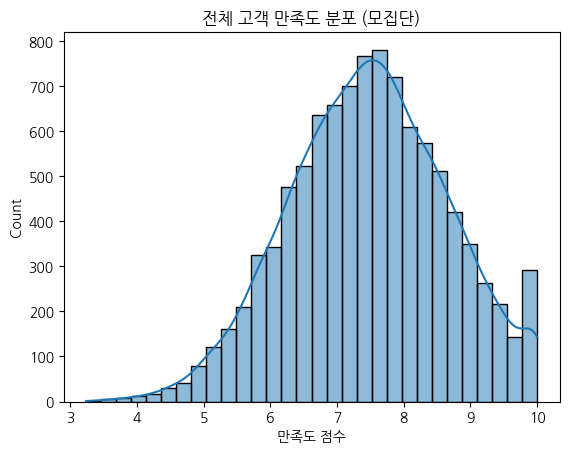

In [28]:
# 모집단 생성 (전체 고객 만족도 10,000명)
np.random.seed(2025)
population = np.random.normal(loc=7.5, scale=1.2, size=10000)
population = np.clip(population, 1, 10)  # 1점 ~ 10점 사이로 제한
df_pop = pd.DataFrame({'score': population})

# 전체 모집단 시각화
sns.histplot(df_pop['score'], bins=30, kde=True)
plt.title("전체 고객 만족도 분포 (모집단)")
plt.xlabel("만족도 점수")
plt.show()

In [29]:
# Q1. 모집단에서 무작위로 30명을 뽑아 표본 평균 구하기

np.random.seed(2025)  # 재현 가능성 확보

sample_30 = np.random.choice(population, size=30, replace=False)
sample_mean = sample_30.mean()

print("추출된 표본(30명)의 만족도 점수:")
print(sample_30)
print(f"\n표본 평균 만족도: {sample_mean:.3f}")


추출된 표본(30명)의 만족도 점수:
[7.15007966 7.7393484  7.03293945 7.91313711 6.93951644 5.65084442
 7.43005279 7.17356319 6.88374833 6.96786101 8.52459225 9.82814791
 7.77402127 7.08677594 5.55729163 7.10447556 8.16102197 7.92354825
 8.13035687 7.51814866 5.91074111 8.03647362 7.84949589 7.27527683
 7.52154547 8.28112575 9.0735261  5.85709349 6.91310297 6.93441453]

표본 평균 만족도: 7.405


In [30]:
# Q2. 표본 추출을 500번 반복하여 표본 평균 저장

np.random.seed(2025)

sample_size = 30
n_trials = 500

sample_means = []

for _ in range(n_trials):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(sample.mean())

sample_means = np.array(sample_means)


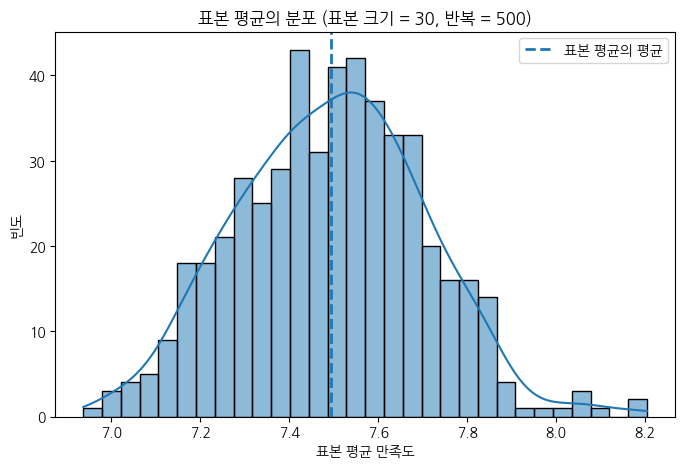

In [31]:
# Q3. 표본 평균들의 분포를 히스토그램으로 시각화하고 평균선 표시

plt.figure(figsize=(8,5))
sns.histplot(sample_means, bins=30, kde=True)
plt.axvline(sample_means.mean(), linestyle='--', linewidth=2, label='표본 평균의 평균')

plt.title("표본 평균의 분포 (표본 크기 = 30, 반복 = 500)")
plt.xlabel("표본 평균 만족도")
plt.ylabel("빈도")
plt.legend()
plt.show()


- 표본 평균들은 어떤 값 주변에 많이 분포해 있나요? 이 값은 전체 모집단 평균과 얼마나 비슷한가요?
>표본 평균들은 모집단 평균 근처에 가장 많이 몰려있다.

- 표본을 1번 뽑았을 때와 500번을 반복해서 뽑았을 때, 표본 평균의 분포나 신뢰성에는 어떤 차이가 있나요
>1번 뽑을 땐 모집단을 대표하는지 알 수 없지만 500번 반복시 평균들이 어디에 몰리는지 패턴이 보인다.

- 친구가 다른 표본을 뽑았다면 같은 평균이 나왔을까요? 비슷한 결과가 나왔더라도 완전히 같지 않았다면, 그 이유는 무엇일까요?
>표본은 무작위 추출이라 완전히 같지 않고 비슷한 값이 나온다.

- 표본 평균들의 분포는 어떤 모양인가요? 종 모양의 정규분포처럼 보이나요? 그렇다면 왜 그렇게 되는 걸까요?
>정규분포에 가깝다.
중심극한정리 때문이다.

**문제 2. 중심극한정리**

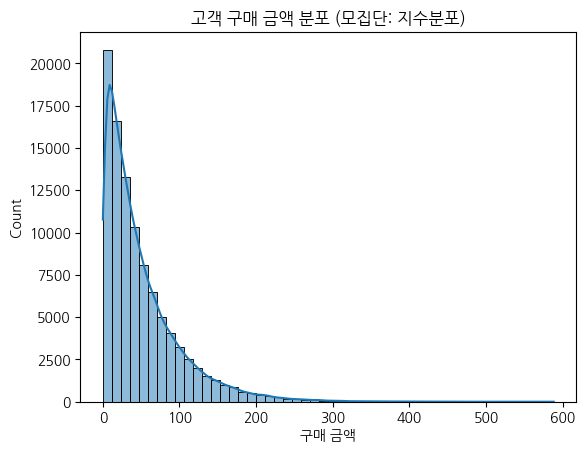

In [32]:
# 지수분포를 따르는 모집단 생성
np.random.seed(2025)
population = np.random.exponential(scale=50, size=100000)  # 평균 50, 비대칭 분포

# 모집단 시각화
sns.histplot(population, bins=50, kde=True)
plt.title("고객 구매 금액 분포 (모집단: 지수분포)")
plt.xlabel("구매 금액")
plt.show()

In [33]:
#Q1. 표본 크기 = 5, 표본을 1000번 뽑아 표본 평균 계산
np.random.seed(2025)

n_trials = 1000
sample_size_5 = 5

sample_means_5 = []

for _ in range(n_trials):
    sample = np.random.choice(population, size=sample_size_5, replace=False)
    sample_means_5.append(sample.mean())

sample_means_5 = np.array(sample_means_5)


In [34]:
#Q2. 표본 크기 = 30, 100에 대해서도 동일하게 반복
# 표본 크기 = 30
sample_size_30 = 30
sample_means_30 = []

for _ in range(n_trials):
    sample = np.random.choice(population, size=sample_size_30, replace=False)
    sample_means_30.append(sample.mean())

sample_means_30 = np.array(sample_means_30)


# 표본 크기 = 100
sample_size_100 = 100
sample_means_100 = []

for _ in range(n_trials):
    sample = np.random.choice(population, size=sample_size_100, replace=False)
    sample_means_100.append(sample.mean())

sample_means_100 = np.array(sample_means_100)


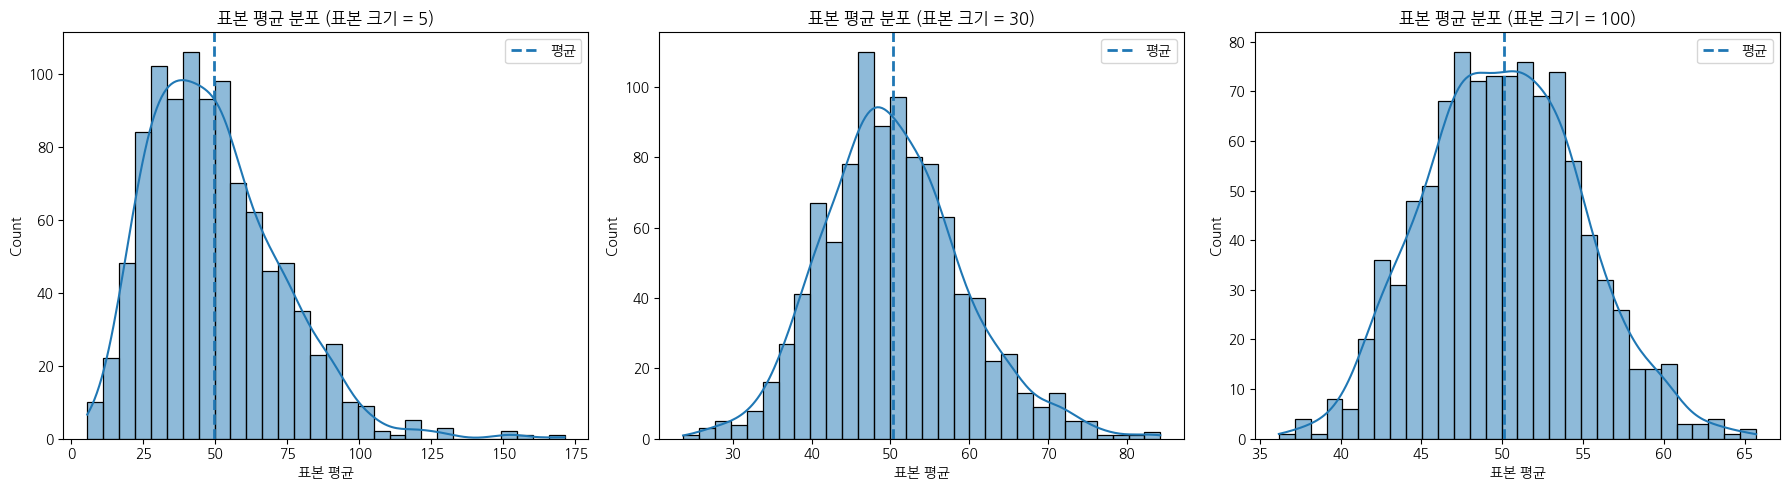

In [35]:
#Q3. 표본 크기별 표본 평균 분포 히스토그램 + 평균선
plt.figure(figsize=(18,5))

# 표본 크기 = 5
plt.subplot(1,3,1)
sns.histplot(sample_means_5, bins=30, kde=True)
plt.axvline(sample_means_5.mean(), linestyle='--', linewidth=2, label='평균')
plt.title("표본 평균 분포 (표본 크기 = 5)")
plt.xlabel("표본 평균")
plt.legend()

# 표본 크기 = 30
plt.subplot(1,3,2)
sns.histplot(sample_means_30, bins=30, kde=True)
plt.axvline(sample_means_30.mean(), linestyle='--', linewidth=2, label='평균')
plt.title("표본 평균 분포 (표본 크기 = 30)")
plt.xlabel("표본 평균")
plt.legend()

# 표본 크기 = 100
plt.subplot(1,3,3)
sns.histplot(sample_means_100, bins=30, kde=True)
plt.axvline(sample_means_100.mean(), linestyle='--', linewidth=2, label='평균')
plt.title("표본 평균 분포 (표본 크기 = 100)")
plt.xlabel("표본 평균")
plt.legend()

plt.tight_layout()
plt.show()


* **표본 크기가 작을 때 (예: 5)**

  > 한쪽으로 치우친 비대칭 형태를 보이며, 값의 변동 폭도 크다. 일부 큰 값에 의해 평균이 크게 흔들리는 경우가 많다.

* **표본 크기가 커질수록 평균 분포의 모양 변화**

  > 표본 크기가 30, 100으로 커질수록 표본 평균들의 분포는 점점 대칭적인 종 모양을 띠며 정규분포에 가까워진다. 동시에 평균들이 특정 값 주변에 더 촘촘히 모인다.

* **모집단은 비대칭인데 평균 분포가 정규분포처럼 보이는 이유**

  > 각 표본 평균은 여러 개의 관측값이 합쳐진 결과이기 때문에 비대칭이 아닌 평균들의 분포는 원래 모집단의 형태와 무관하게 정규분포에 가까워진다.

* **이 실험을 통해 이해한 중심극한정리**

  > 모집단의 분포가 비정규분포이더라도 표본 크기가 충분히 크면, 표본 평균의 분포는 모집단 평균을 중심으로 한 정규분포에 수렴한다는 원리를 직접 확인할 수 있었다.

* **표본 크기에 따른 분포의 넓이(흩어짐) 변화**

  > 표본 크기가 커질수록 표본 평균들의 분포는 점점 좁아지며 흩어짐이 감소한다. 이는 표본 평균의 분산이 표본 크기에 반비례하기 때문이다.


**문제 3. 표준오차**

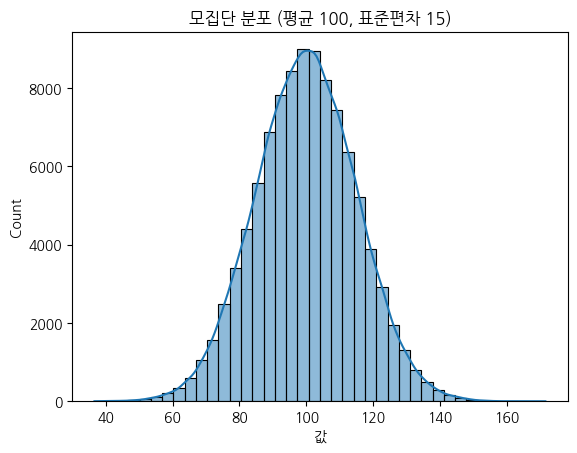

In [36]:
# 모집단 생성 (평균 100, 표준편차 15)
np.random.seed(2025)
population = np.random.normal(loc=100, scale=15, size=100000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("모집단 분포 (평균 100, 표준편차 15)")
plt.xlabel("값")
plt.show()


In [37]:
# Q1. 표본 크기 10, 30, 100, 500에 대해 각각 1000번 표본을 뽑고, 평균을 구해봅시다.
# 각 표본 평균 분포의 표준편차를 계산해봅시다.
# 결과를 리스트에 저장하고, 표로 정리해봅시다.

sample_sizes = [10, 30, 100, 500]
n_trials = 1000

results = []

for n in sample_sizes:
    sample_means = []
    for _ in range(n_trials):
        sample = np.random.choice(population, size=n, replace=False)
        sample_means.append(sample.mean())
    se_empirical = np.std(sample_means, ddof=1)
    results.append([n, se_empirical])

df_result = pd.DataFrame(results, columns=["sample_size", "SE_empirical"])
display(df_result)


,sample_size,SE_empirical
0,10,4.659081
1,30,2.786076
2,100,1.526038
3,500,0.663386


In [38]:
# Q2. 이론적인 표준오차와 비교해봅시다.
# [공식] 표준오차(SE) = 모집단 표준편차 / √표본크기

pop_std = np.std(population, ddof=0)

df_result["SE_theoretical"] = pop_std / np.sqrt(df_result["sample_size"])
df_result["abs_diff"] = np.abs(df_result["SE_empirical"] - df_result["SE_theoretical"])
df_result["rel_diff(%)"] = (df_result["abs_diff"] / df_result["SE_theoretical"]) * 100

display(df_result)


,sample_size,SE_empirical,SE_theoretical,abs_diff,rel_diff(%)
0,10,4.659081,4.753921,0.094840,1.994981
1,30,2.786076,2.744677,0.041398,1.508305
2,100,1.526038,1.503322,0.022716,1.511053
3,500,0.663386,0.672306,0.008919,1.326702


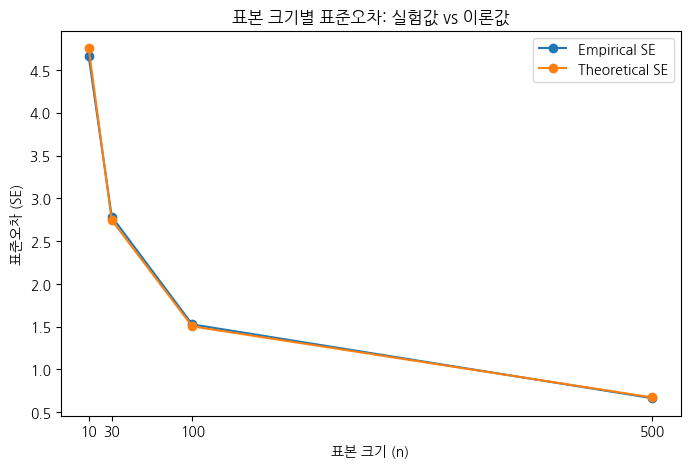

In [39]:
# Q3. 실험값과 이론값을 시각화해봅시다.
# 표본 크기를 x축, 표준오차를 y축으로 한 꺾은선 그래프를 그려봅시다.

plt.figure(figsize=(8,5))
plt.plot(df_result["sample_size"], df_result["SE_empirical"], marker='o', label="Empirical SE")
plt.plot(df_result["sample_size"], df_result["SE_theoretical"], marker='o', label="Theoretical SE")
plt.title("표본 크기별 표준오차: 실험값 vs 이론값")
plt.xlabel("표본 크기 (n)")
plt.ylabel("표준오차 (SE)")
plt.xticks(df_result["sample_size"])
plt.legend()
plt.show()


* **표본 크기가 작을수록 표본 평균의 분포는 어떤 모양인가요? 넓게 퍼져 있나요?**

  > 표본 크기가 작을수록 표본 평균의 분포는 넓게 퍼져 있다.

* **표본 크기가 커질수록 평균 분포는 어떻게 변하나요?**

  > 표본 크기가 커질수록 표본 평균의 분포는 점점 좁아지며 모평균 주변에 더 밀집된다. 즉,평균 추정이 더 안정적이고 일관되게 된다.

* **실험값과 이론값(공식 계산값)은 얼마나 비슷한가요?**

  > 시뮬레이션으로 구한 실험적 표준오차는 이론 공식으로 계산한 표준오차와 매우 유사하다. 표본 크기가 클수록 두 값의 차이는 더욱 작아진다.

* **왜 표본 크기가 커질수록 표준오차는 작아질까요?**

  > 표본 크기가 커질수록 하나의 표본 평균에 포함되는 정보량이 증가하고, 우연한 변동이 감소한다. 이로 인해 표본 평균의 분산과 표준오차가 줄어든다.


**문제 4. 신뢰구간 계산과 해석**

표본이 얼마나 불안정한지 → 표준오차(SE)

얼마나 확실하게 잡고 싶은지 → 신뢰수준(90%, 95%, 99%)

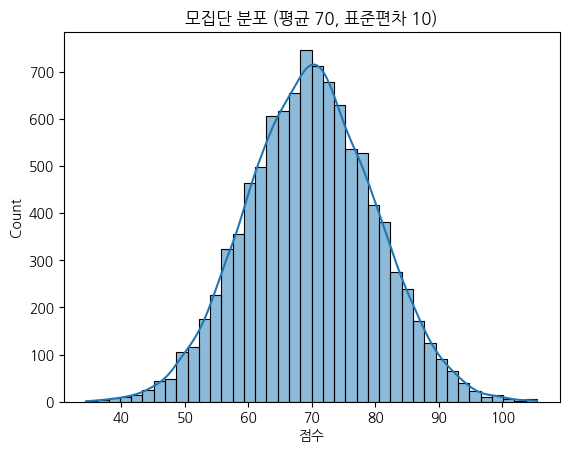

In [40]:
# 모집단 생성
np.random.seed(2025)
population = np.random.normal(loc=70, scale=10, size=10000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("모집단 분포 (평균 70, 표준편차 10)")
plt.xlabel("점수")
plt.show()

In [41]:
# Q1. 모집단에서 표본 30명을 무작위로 추출하고, 표본 평균과 표준편차를 구해봅시다.
# 표준오차도 함께 계산해보세요.

from scipy import stats

np.random.seed(2025)

n = 30
sample = np.random.choice(population, size=n, replace=False)

xbar = np.mean(sample)
s = np.std(sample, ddof=1)          # 표본 표준편차
se = s / np.sqrt(n)                 # 표준오차(표본 기준)

print(f"표본평균: {xbar:.4f}")
print(f"표본표준편차(s): {s:.4f}")
print(f"표준오차(SE): {se:.4f}")


표본평균: 69.2062
표본표준편차(s): 7.8755
표준오차(SE): 1.4379


In [42]:
# Q2. 모집단의 표준편차를 알고 있다고 가정하고, z-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

sigma = np.std(population, ddof=0)  # 모집단 표준편차(σ) "알고 있다" 가정
se_z = sigma / np.sqrt(n)

z_crit = stats.norm.ppf(0.975)      # 95% 양측 -> 0.975
ci_z_95 = (xbar - z_crit * se_z, xbar + z_crit * se_z)

print(f"모집단 표준편차(σ): {sigma:.4f}")
print(f"z기반 표준오차: {se_z:.4f}")
print(f"z-분포 95% 신뢰구간: ({ci_z_95[0]:.4f}, {ci_z_95[1]:.4f})")
print(f"구간폭: {(ci_z_95[1]-ci_z_95[0]):.4f}")


모집단 표준편차(σ): 10.0051
z기반 표준오차: 1.8267
z-분포 95% 신뢰구간: (65.6260, 72.7864)
구간폭: 7.1604


In [43]:
# Q3. 모집단의 표준편차를 모른다고 가정하고, 표본 표준편차와 t-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

df = n - 1
t_crit = stats.t.ppf(0.975, df=df)

ci_t_95 = (xbar - t_crit * se, xbar + t_crit * se)

print(f"자유도(df): {df}")
print(f"t-분포 95% 신뢰구간: ({ci_t_95[0]:.4f}, {ci_t_95[1]:.4f})")
print(f"구간폭: {(ci_t_95[1]-ci_t_95[0]):.4f}")


자유도(df): 29
t-분포 95% 신뢰구간: (66.2654, 72.1469)
구간폭: 5.8815


,confidence,z_low,z_high,z_width,t_low,t_high,t_width
0,90%,66.201576,72.210794,6.009218,66.763074,71.649297,4.886223
1,95%,65.625973,72.786398,7.160425,66.265426,72.146945,5.881519
2,99%,64.500989,73.911382,9.410393,65.242880,73.169490,7.926610


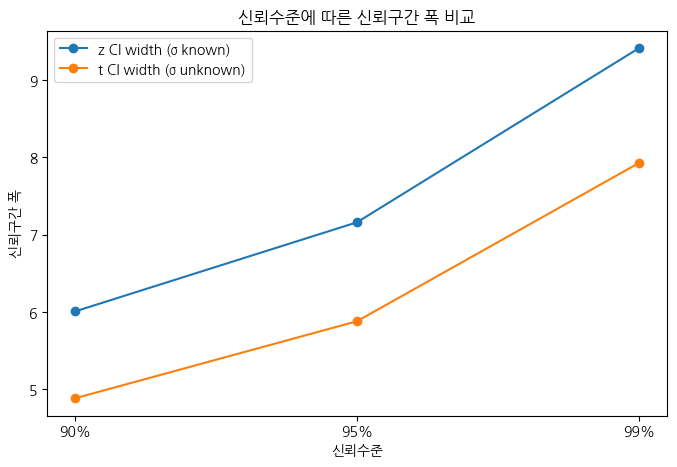

In [44]:
# Q4. 신뢰수준을 90%, 99%로 바꿔가며 신뢰구간을 계산해보고, 그 폭을 비교해봅시다.

confidence_levels = [0.90, 0.95, 0.99] #비교할 신뢰수준 목록
rows = []

for conf in confidence_levels: #신뢰수준을 유의수준 α로 변환
    alpha = 1 - conf
    z = stats.norm.ppf(1 - alpha/2)
    t = stats.t.ppf(1 - alpha/2, df=df)
#각 신뢰수준에 맞는 z값, t값 계산
    ci_z = (xbar - z * se_z, xbar + z * se_z)
    ci_t = (xbar - t * se,   xbar + t * se)
#구간 폭 저장
    rows.append([
        f"{int(conf*100)}%",
        ci_z[0], ci_z[1], ci_z[1]-ci_z[0],
        ci_t[0], ci_t[1], ci_t[1]-ci_t[0]
    ])

df_ci = pd.DataFrame(
    rows,
    columns=["confidence", "z_low", "z_high", "z_width", "t_low", "t_high", "t_width"]
)

display(df_ci)

plt.figure(figsize=(8,5))
plt.plot(df_ci["confidence"], df_ci["z_width"], marker='o', label="z CI width (σ known)")
plt.plot(df_ci["confidence"], df_ci["t_width"], marker='o', label="t CI width (σ unknown)")
plt.title("신뢰수준에 따른 신뢰구간 폭 비교")
plt.xlabel("신뢰수준")
plt.ylabel("신뢰구간 폭")
plt.legend()
plt.show()



* **z-분포와 t-분포를 사용한 신뢰구간의 차이**

  > t-분포를 사용한 신뢰구간이 z-분포보다 조금 더 넓다. 모집단의 표준편차를 모르기 때문에 더 넓은 구간을 잡았기 때문이다.

* **신뢰수준이 높아질수록 신뢰구간의 폭 변화와 그 이유**

  > 신뢰수준이 90%에서 95%, 99%로 높아질수록 신뢰구간의 폭은 점점 넓어진다.
  높은 신뢰수준은 모평균이 이 구간 안에 있을 확률을 더 높이기 위해선,오차범위를 더 크게 잡아야 하기 때문이다.

* **신뢰구간이 넓다는 것의 의미**

  > 넓으면 안전하지만 정확하지 않고, 좁으면 정확하지만 틀릴 위험이 커지기에, 선택에 따라 좋고 나쁨의 차이가 있을 것이다.

* **실제 고객 만족도 데이터에서의 마케팅 활용 방안**

  > 평균 점수 하나만 보지 않고, “최소 이 정도는 나올 수 있다”는 하한을 함께 본다.
  >신뢰구간의 아래쪽 값이 기준보다 낮다면 고객 불만 위험이 있다고 판단해 개선 전략을 세울 수 있다.


**문제 5. 미니 프로젝트 - 고객 만족도 신뢰구간 추정**

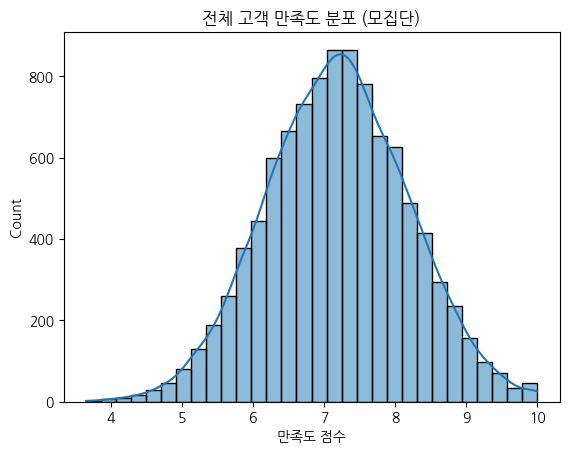

In [45]:
# 모집단 생성 (고객 만족도 10,000명)
np.random.seed(2025)
population = np.random.normal(loc=7.2, scale=1.0, size=10000)
population = np.clip(population, 1, 10)

# 모집단 시각화
sns.histplot(population, bins=30, kde=True)
plt.title("전체 고객 만족도 분포 (모집단)")
plt.xlabel("만족도 점수")
plt.show()

In [46]:
# Q1. 모집단에서 표본 40명을 무작위로 추출하고, 표본 평균과 표준편차를 구해봅시다.

np.random.seed(2025)

n = 40
sample = np.random.choice(population, size=n, replace=False)

xbar = np.mean(sample)                 # 표본 평균
s = np.std(sample, ddof=1)             # 표본 표준편차

print(f"표본평균: {xbar:.3f}")
print(f"표본표준편차: {s:.3f}")


표본평균: 7.226
표본표준편차: 0.897


In [47]:
# Q2. 표준오차(SE)를 구하고, t-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

from scipy import stats

se = s / np.sqrt(n)                    # 표준오차
df = n - 1                             # 자유도
t_crit = stats.t.ppf(0.975, df=df)     # 95% t값

ci_low = xbar - t_crit * se
ci_high = xbar + t_crit * se

print(f"표준오차(SE): {se:.3f}")
print(f"95% 신뢰구간: ({ci_low:.3f}, {ci_high:.3f})")
print(f"신뢰구간 폭: {(ci_high - ci_low):.3f}")


표준오차(SE): 0.142
95% 신뢰구간: (6.939, 7.513)
신뢰구간 폭: 0.574


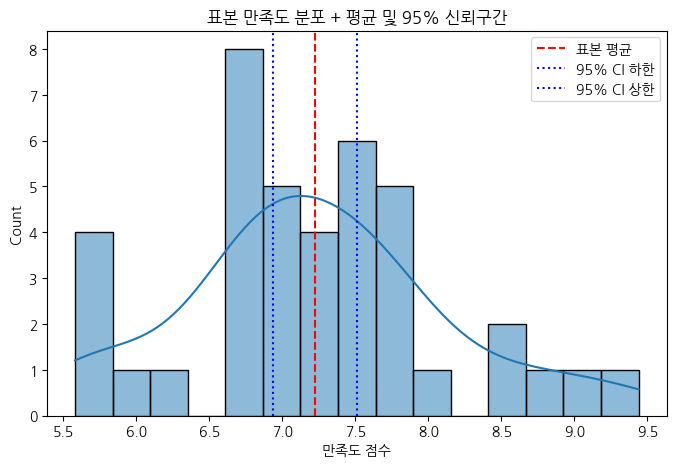

In [48]:
# Q3. 표본 데이터의 히스토그램을 그리고, 평균 및 신뢰구간을 함께 시각화해봅시다.

plt.figure(figsize=(8,5))
sns.histplot(sample, bins=15, kde=True)

plt.axvline(xbar, color='red', linestyle='--', label='표본 평균')
plt.axvline(ci_low, color='blue', linestyle=':', label='95% CI 하한')
plt.axvline(ci_high, color='blue', linestyle=':', label='95% CI 상한')

plt.title("표본 만족도 분포 + 평균 및 95% 신뢰구간")
plt.xlabel("만족도 점수")
plt.legend()
plt.show()


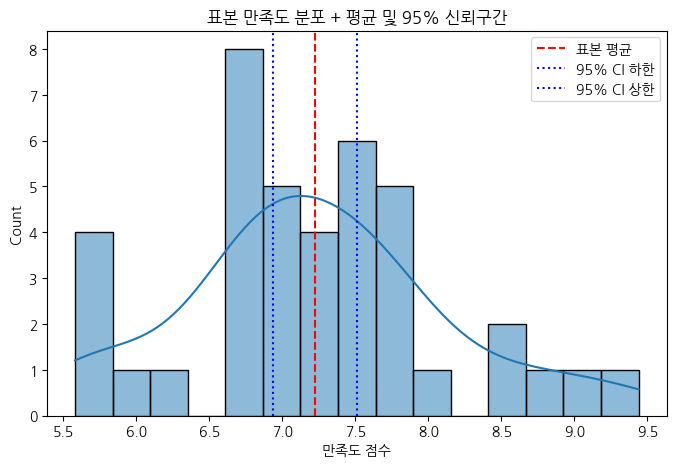

In [49]:
# Q3. 표본 데이터의 히스토그램을 그리고, 평균 및 신뢰구간을 함께 시각화해봅시다.

plt.figure(figsize=(8,5))
sns.histplot(sample, bins=15, kde=True)

plt.axvline(xbar, color='red', linestyle='--', label='표본 평균')
plt.axvline(ci_low, color='blue', linestyle=':', label='95% CI 하한')
plt.axvline(ci_high, color='blue', linestyle=':', label='95% CI 상한')

plt.title("표본 만족도 분포 + 평균 및 95% 신뢰구간")
plt.xlabel("만족도 점수")
plt.legend()
plt.show()


* **신뢰구간은 몇 점에서 몇 점 사이인가요?**

  > 계산된 95% 신뢰구간은 Q2에서 구한 하한부터 상한사이이다. 이 범위 안에 실제 고객 만족도의 평균이 있을 것으로 판단한다.

* **이 구간은 전체 모집단 평균을 포함하고 있나요?**

  > 이번 실습에서는 모집단 평균이 약 **7.2**이므로, 신뢰구간이 7.2를 포함하고 있다면 표본으로 얻은 추정이 모집단 평균과 일관된 결과라고 볼 수 있다.

* **이 결과를 바탕으로 고객 만족도가 충분히 높다고 말할 수 있을까요?**

  > 신뢰구간의 하한값이 내부 기준이상이라면 평균적으로 고객 만족도가 충분히 높다고 말할 수 있다. 반대로 하한이 기준보다 낮다면 일부 고객의 만족도가 낮을 가능성을 고려해야 한다.

* **만약 신뢰구간이 너무 넓게 나왔다면, 그 이유와 개선 방법은 무엇일까요?**

  > 신뢰구간이 넓은 이유는 표본 수가 적거나, 고객 만족도의 변동성이 크기 때문이다. 이를 개선하려면 표본 크기를 늘리거나, 고객을 세분화하여 더 균질한 집단별로 분석하는 방법이 있다.
